In [25]:
#Importing our dataset from csv file
import pandas as pd 
dataset=pd.read_csv("titanic-passengers.csv", sep=";")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

In [18]:
print(x)

     PassengerId  Pclass  Sex        Age  SibSp  Parch     Fare
0            343       2    1  28.000000      0      0  13.0000
1             76       3    1  25.000000      0      0   7.6500
2            641       3    1  20.000000      0      0   7.8542
3            568       3    0  29.000000      0      4  21.0750
4            672       1    1  31.000000      1      0  52.0000
..           ...     ...  ...        ...    ...    ...      ...
886           10       2    0  14.000000      1      0  30.0708
887           61       3    1  22.000000      0      0   7.2292
888          535       3    0  30.000000      0      0   8.6625
889          102       3    1  29.699118      0      0   7.8958
890          428       2    0  19.000000      0      0  26.0000

[891 rows x 7 columns]


In [32]:
#applying tree algorithm
model = tree.DecisionTreeClassifier(criterion='gini',splitter='random')  
model.fit(x_train, y_train)   #fitting our model
y_pred=model.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.776536312849162


In [33]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/HP/anaconda3/Library/bin/graphviz/'

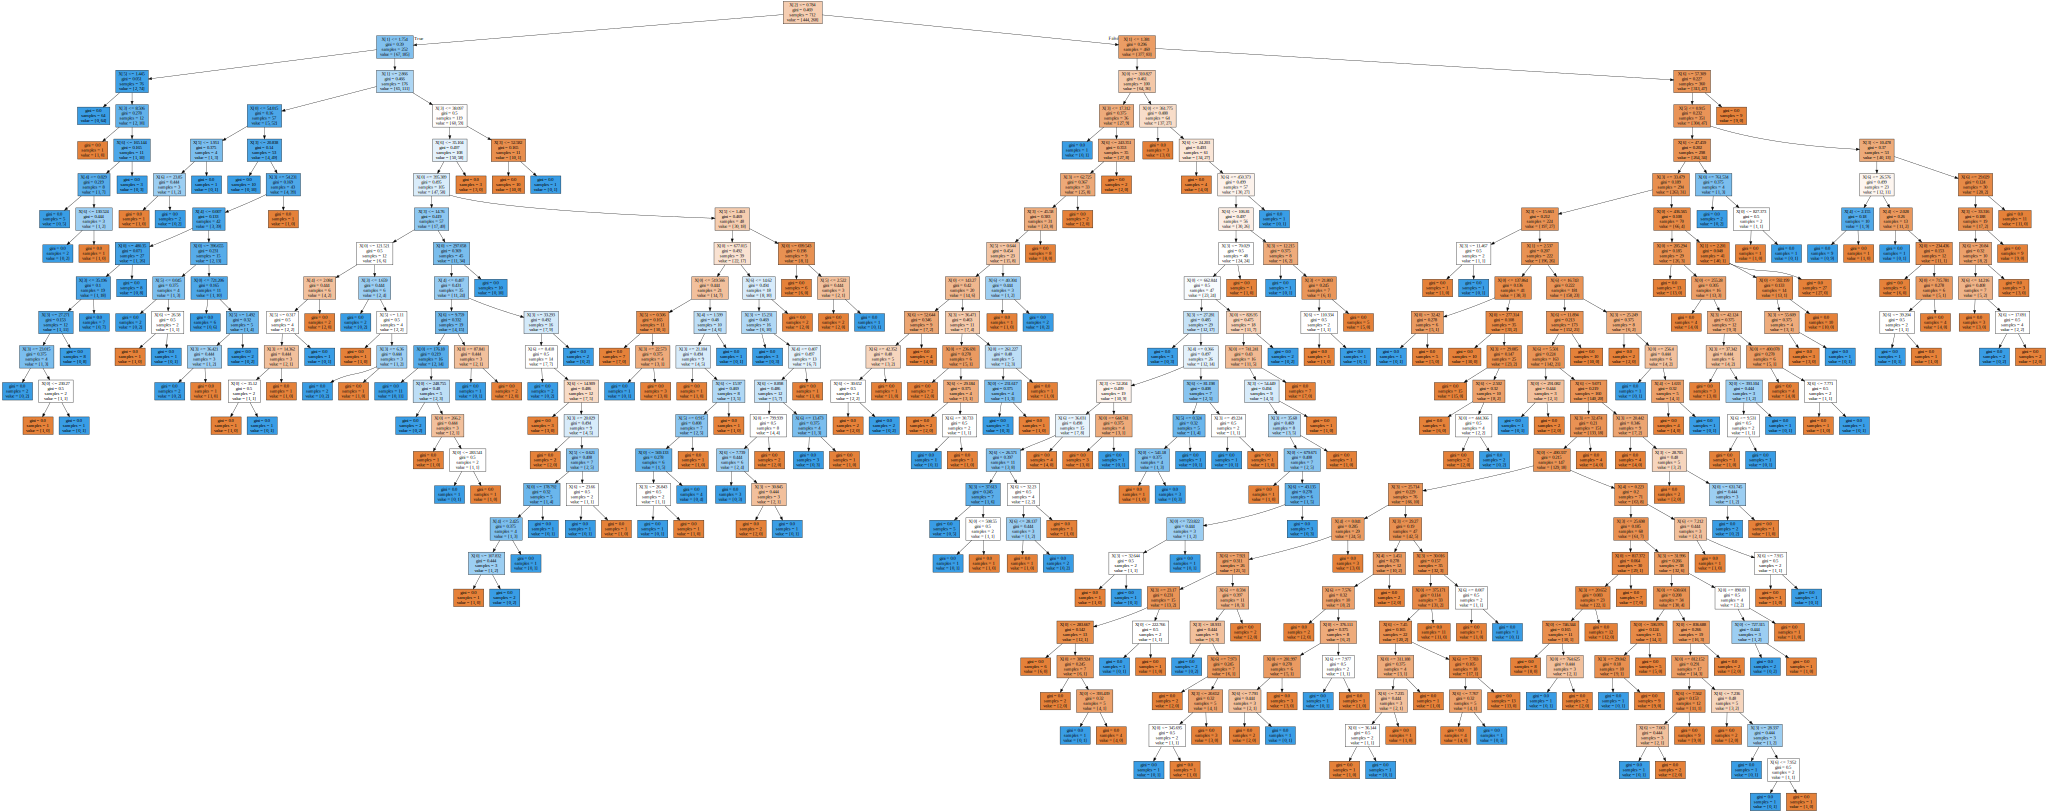

In [34]:
import graphviz
d=tree.export_graphviz(model,out_file=None,filled = True)
graph=graphviz.Source(d)
graph.render('data')
graph

In [36]:
'''for the passenger who\'s name is Collander, Mr. Erik Gustaf, his corresponding path is right right left left left left right left right right left which value=[15,0], So he survived.  '''

"for the passenger who's name is Collander, Mr. Erik Gustaf, his corresponding path is right right left left left left right left right right left which value=[15,0], So he survived.  "

In [37]:
#applying tree algorithm
model = tree.DecisionTreeClassifier(criterion='gini',splitter='random',min_samples_leaf=5,max_leaf_nodes=70)  
model.fit(x_train, y_train)   #fitting our model
y_pred=model.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7821229050279329


In [38]:
print('first accuracy=0.776536312849162 < second accuracy=0.7821229050279329 ')

first accuracy=0.776536312849162 < second accuracy=0.7821229050279329 


In [39]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 10 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8659217877094972


In [40]:
print('decision tree accuracy=0.7821229050279329 < random forest accuracy= 0.8659217877094972')

decision tree accuracy=0.7821229050279329 < random forest accuracy= 0.8659217877094972
